<center>


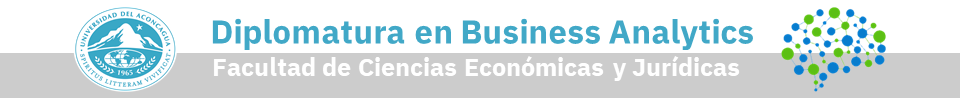

<center/>

<center>
<font color="#41a8c7">
<h2><b>
Serie de tiempo-Series estacional-Modelo SARIMA
</font>
</center>

**Ejercicio Nº23**  Retomando el caso de los afiliados del ejercicio de regresión lineal; el dueño está interesado ahora en poder predecir cuántos afiliados va a tener en el próximo año , para poder determinar si va  a tener los suficientes afiliados para poder cubrir los costos. Las observaciones van a ser en forma mensual.

Instalar librería

In [12]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




Cargar librería

In [18]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



1.Transformar los datos en datos ts y graficar

In [5]:
datos=c(30,60,70,120,160,170,100, 230,200,160,180, 120, 80, 130,120,80,170, 110, 110,160,100, 80,
        90,50,110,100,80,100,70,120,100, 110,70, 80,100, 70, 130, 140,100, 110, 100,  140,140,140,
        120, 140,130,130,120, 110,120,130,120,110,120,110, 140, 160, 90, 60, 90, 90,100,130, 100,
        90, 90,90,80, 70, 60, 60, 90,120, 110,140,150, 150, 120,120,  130, 120,130, 150, 120,120,
        110,140,150,150, 120,120, 130,120, 130, 150,110,80,80,110,130,120, 140, 150,170,170,120,
        90, 80, 120,170,170,190,200,170, 140,110,140, 160,190,170,130,210,180,160, 210, 190, 190,
        150,200,200,210, 220, 280,170,200,240, 200, 200, 180, 210, 180, 180, 180, 160, 170, 170,
        150,150,170,180,170,220,260,200,190,150,130,120,110,70,80, 100,90,140,110, 110,110,60,70,
        90, 100,100,70,90,80,120, 60,70,70,50,50,80,60, 70,40,60,40, 50,50,60, 50, 60,  80,
         80,  120,  100,  110,   90,  110,   80,   90,   90,   90,  100,  100)

Transformar los datos en ts

In [6]:
datos.ts = ts(datos, start = c(2005,1), frequency = 12)

datos.ts



,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2005,30,60,70,120,160,170,100,230,200,160,180,120
2006,80,130,120,80,170,110,110,160,100,80,90,50
2007,110,100,80,100,70,120,100,110,70,80,100,70
2008,130,140,100,110,100,140,140,140,120,140,130,130
2009,120,110,120,130,120,110,120,110,140,160,90,60
2010,90,90,100,130,100,90,90,90,80,70,60,60
2011,90,120,110,140,150,150,120,120,130,120,130,150
2012,120,120,110,140,150,150,120,120,130,120,130,150
2013,110,80,80,110,130,120,140,150,170,170,120,90
2014,80,120,170,170,190,200,170,140,110,140,160,190


Gráficar

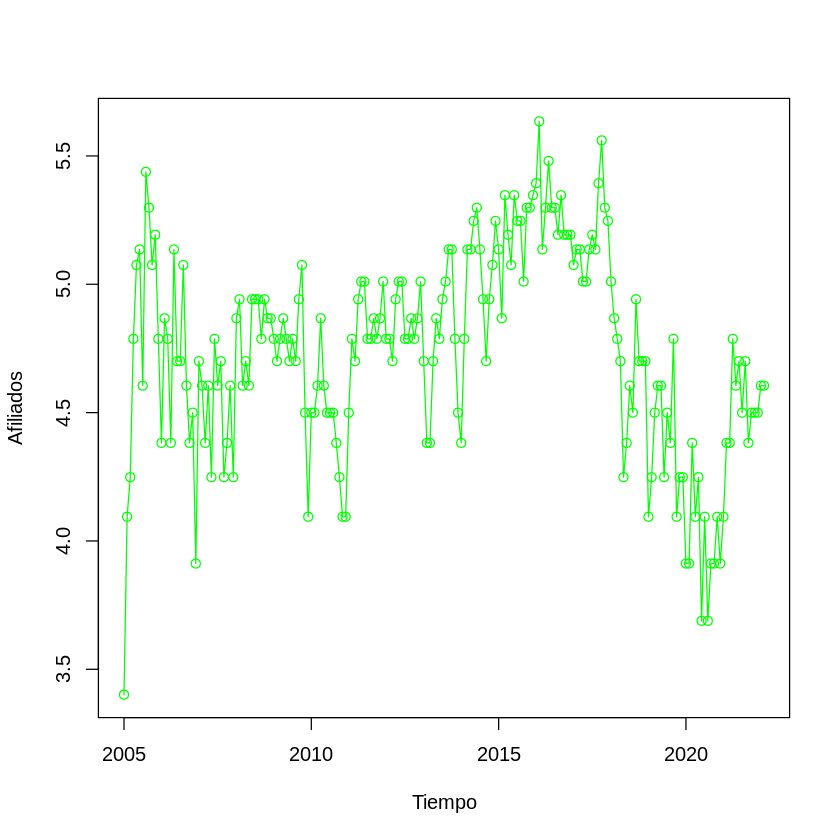

In [13]:

plot(datos.ts, ylab="Afiliados", xlab="Tiempo" ,type="o",lwd=1,pch=1,cex=1,col="Green")

2.Transformar los datos en logaritmo (Cuando se trabaja con datos reales se debe usar siempre logaritmo)

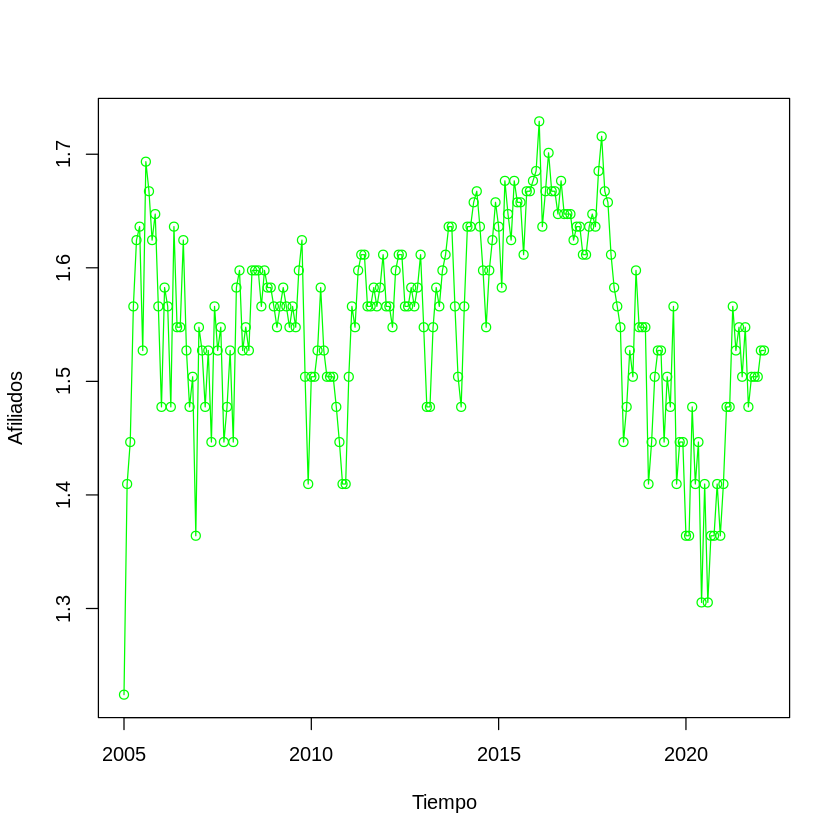

In [14]:
datos.ts = log(datos.ts)
plot(datos.ts, ylab="Afiliados", xlab="Tiempo" ,type="o",lwd=1,pch=1,cex=1,col="Green")

3.Construir el gráfico de caja y bigotes en función de los meses, para observar si existe estacionalidad

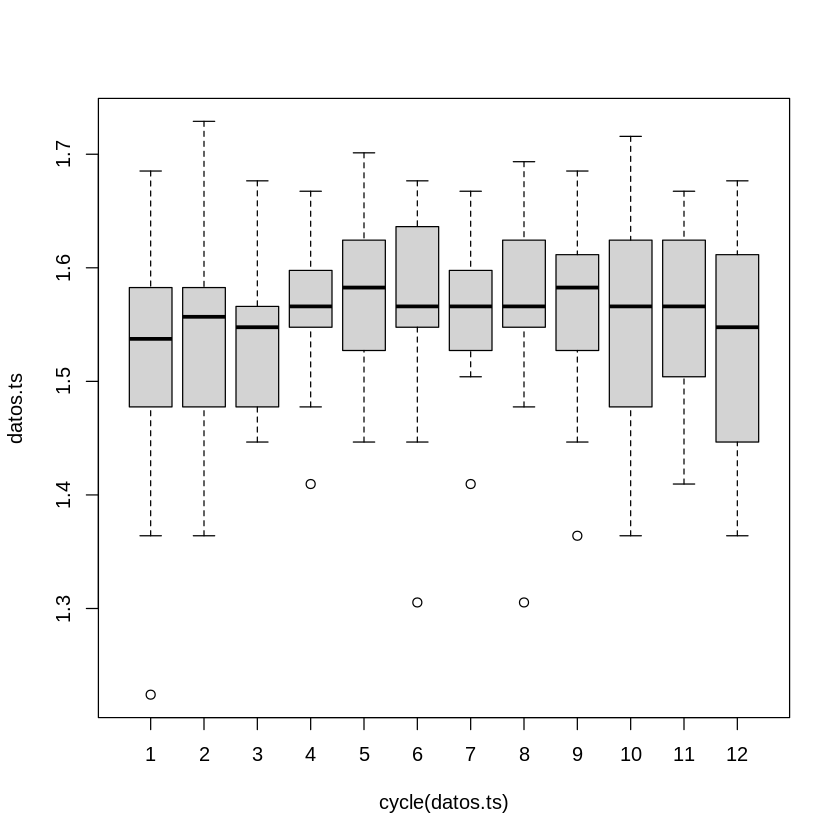

In [19]:
boxplot(datos.ts ~ cycle(datos.ts))

4.Descomponer la serie en tendencia, estacionalidad y serie estacional

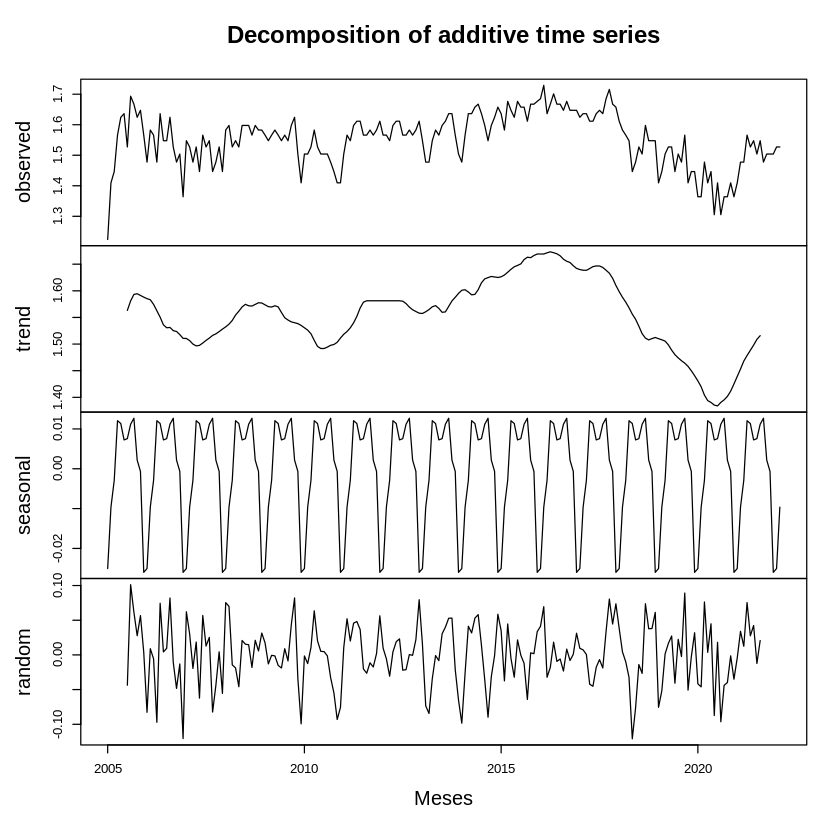

In [20]:
datos.ts.desc = decompose(datos.ts)
plot(datos.ts.desc, xlab='Meses')

5.Estimar el modelo SARIMA

In [21]:
fit=auto.arima(datos.ts,seasonal = T,ic = c("aicc"), stepwise=T, allowdrift = T)
summary(fit)

Series: datos.ts 
ARIMA(2,1,2)(2,0,0)[12] 

Coefficients:
         ar1     ar2      ma1     ma2    sar1     sar2
      0.6168  0.2116  -1.0284  0.0539  0.2414  -0.1584
s.e.  0.3329  0.1909   0.3378  0.2785  0.0808   0.0879

sigma^2 = 0.002819:  log likelihood = 313.09
AIC=-612.17   AICc=-611.6   BIC=-588.91

Training set error measures:
                      ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.003710928 0.0521807 0.0399545 0.1552043 2.608352 0.5717409
                   ACF1
Training set 0.03645082

6.Hacer la predicción a 12 meses con sus respectivos intervalos de confianza

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Mar 2022       1.514642 1.446604 1.582681 1.410587 1.618698
Apr 2022       1.545832 1.466890 1.624775 1.425100 1.666565
May 2022       1.531180 1.442306 1.620053 1.395260 1.667100
Jun 2022       1.558657 1.462999 1.654316 1.412360 1.704954
Jul 2022       1.531824 1.430893 1.632755 1.377463 1.686185
Aug 2022       1.559045 1.454008 1.664082 1.398405 1.719685
Sep 2022       1.532955 1.424632 1.641279 1.367289 1.698622
Oct 2022       1.539487 1.428489 1.650486 1.369730 1.709245
Nov 2022       1.532383 1.419171 1.645594 1.359240 1.705525
Dec 2022       1.539694 1.424624 1.654765 1.363709 1.715679
Jan 2023       1.538148 1.421495 1.654802 1.359743 1.716554
Feb 2023       1.527463 1.409443 1.645482 1.346968 1.707958

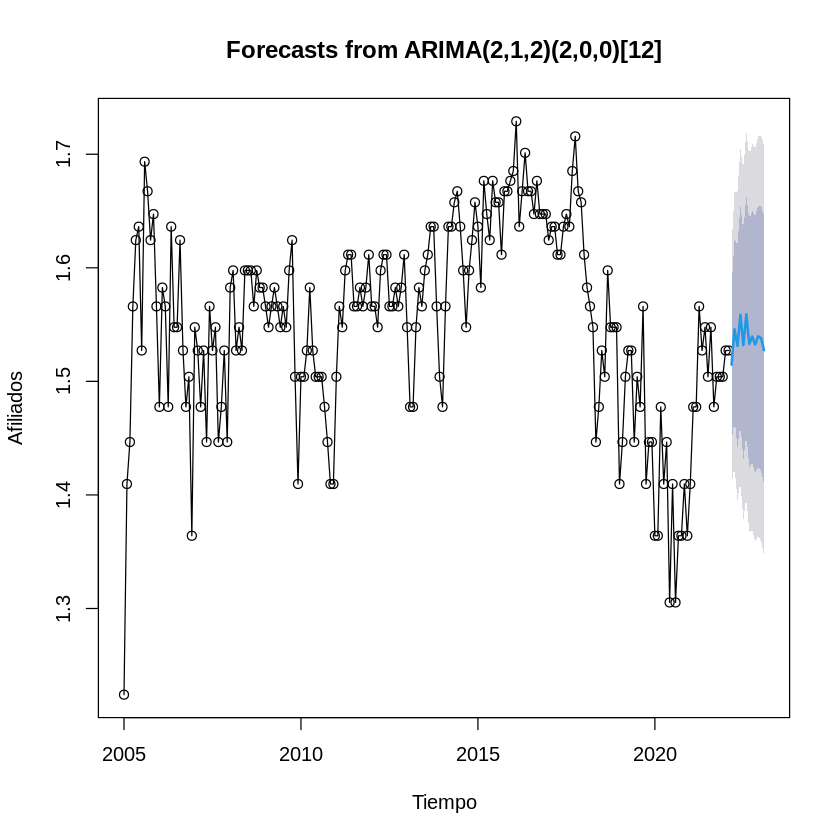

In [22]:
plot(forecast(fit, h=12),ylab="Afiliados", xlab="Tiempo",type="o",lwd=1,pch=1,cex=1)
forecast(fit, h=12)

7.Invertir el logaritmo

In [23]:
predic.log=forecast(fit, h=12)

exp(predic.log$mean)
exp(predic.log$lower)
exp(predic.log$upper)


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2022,,,4.547794,4.691875,4.623629,4.752436,4.626608,4.754279,4.631846,4.662199,4.629193,4.663164
2023,4.655961,4.606475,,,,,,,,,,


,80%,95%
Mar 2022,4.248662,4.098360
Apr 2022,4.335728,4.158273
May 2022,4.230442,4.036023
Jun 2022,4.318892,4.105635
Jul 2022,4.182431,3.964830
Aug 2022,4.280237,4.048738
Sep 2022,4.156327,3.924695
Oct 2022,4.172389,3.934287
Nov 2022,4.133691,3.893234
Dec 2022,4.156293,3.910671


,80%,95%
Mar 2022,4.867987,5.046515
Apr 2022,5.077277,5.293951
May 2022,5.053359,5.296784
Jun 2022,5.229499,5.501133
Jul 2022,5.117957,5.398845
Aug 2022,5.280823,5.582770
Sep 2022,5.161768,5.466412
Oct 2022,5.209511,5.524789
Nov 2022,5.184090,5.504275
Dec 2022,5.231848,5.560450
